Removes the Gradient for the Following Image using Least Squares Estimation

In [ ]:
import numpy as np
from PIL import Image
from numpy.linalg import inv
import matplotlib.pyplot as plt

In [ ]:
# Load cguitar.tif from local machine into Colab instance
# Note: You only need to run this once
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving cguitar.tif to cguitar.tif
User uploaded file "cguitar.tif" with length 105324 bytes


In [ ]:
img = np.asarray(Image.open('cguitar.tif'))
rows = len(img[0:,0])
cols = len(img[0,0:])
shape = (rows, cols)
print(rows)
print(cols)

511
205


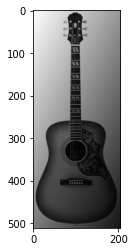

In [ ]:
# Hint: Use the following lines to display an image
plt.imshow(img, cmap='gray')
plt.show()

In [ ]:
# TODO: Compute least-squares estimate from selected corrupt pixels
# Generates input arrays
x = np.array([])
y = np.array([])

for i in range(50):
  sub = np.arange(250)
  y = np.append(y,sub)
for i in range(50):
  sub = i*np.ones((1,250))
  x = np.append(x,sub)

# Puts every cell of img in vector b
b = np.ones((1,12500))
k = 0
for i in range(50):
  for j in range(250):
    b[0,k] = img[j,i]
    k = k + 1
b = b.T

# Least Squares Estimation q = (A.T*A)^{-1}*A.T*b
# A = [x y 1], b = [a b c]
A = np.vstack([x, y, np.ones((1,12500))]).T # Note x and y inputs flipped from transpose
AtA = inv(np.matmul(A.T,A))
Q = np.matmul(AtA,A.T)
q = np.dot(Q,b).T
q = np.array([q[0][1], q[0][0], q[0][2]])

equation = f"f(x,y)=({q[0]})*x+({q[1]})*y+({q[2]})"
print(equation)

f(x,y)=(-0.2549923985983759)*x+(-0.5100654021608664)*y+(253.78763597843906)


In [ ]:
# TODO: Undo the image corruption
final = np.zeros(shape)
gradient = np.zeros(shape)

for i in range(len(img[0:,0])):
  for j in range(len(img[0,0:])):
    gradient[i,j] = (int) (q[0]*i + q[1]*j + q[2])
    final[i,j] = (int) (255*(img[i,j])/(q[0]*i + q[1]*j + q[2]))

# print(final)

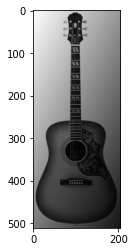

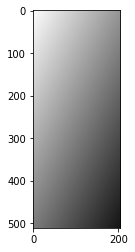

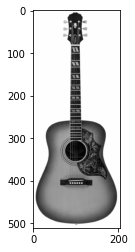

In [ ]:
# TODO: Display the uncorrupted image
background = Image.fromarray(gradient)
finalimg = Image.fromarray(final)
plt.figure()

# The original image
plt.imshow(img,cmap='gray')
plt.show()

# The extracted background gradient, represented by f(x,y)
plt.imshow(background,cmap='gray')
plt.show()

# The uncorrupted image
plt.imshow(finalimg, cmap='gray')
plt.show()